In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
df = pd.read_csv('../resources/EM2030AdvocatesSurvey.csv')
df.head()

,RespID,Q0_Gender,Q0_Generation,Q0_Location,Q0_Org,Q0_GeoFocus,Qtype,Question Grouping,Wording,Question ID,...,Unnamed: 544,Unnamed: 545,Unnamed: 546,Unnamed: 547,Unnamed: 548,Unnamed: 549,Unnamed: 550,Unnamed: 551,Unnamed: 552,Unnamed: 553
0,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
df.shape

(11647, 554)

In [301]:
pd.set_option('max_colwidth', 100)

In [302]:
df.columns

Index(['RespID', 'Q0_Gender', 'Q0_Generation', 'Q0_Location', 'Q0_Org',
       'Q0_GeoFocus', 'Qtype', 'Question Grouping', 'Wording', 'Question ID',
       ...
       'Unnamed: 544', 'Unnamed: 545', 'Unnamed: 546', 'Unnamed: 547',
       'Unnamed: 548', 'Unnamed: 549', 'Unnamed: 550', 'Unnamed: 551',
       'Unnamed: 552', 'Unnamed: 553'],
      dtype='object', length=554)

In [303]:
df.columns[:13]

Index(['RespID', 'Q0_Gender', 'Q0_Generation', 'Q0_Location', 'Q0_Org',
       'Q0_GeoFocus', 'Qtype', 'Question Grouping', 'Wording', 'Question ID',
       'Value', 'Labels', 'Unnamed: 12'],
      dtype='object')

In [304]:
keep = df.columns[:12]

In [305]:
df = df[keep]

In [306]:
df.head()

,RespID,Q0_Gender,Q0_Generation,Q0_Location,Q0_Org,Q0_GeoFocus,Qtype,Question Grouping,Wording,Question ID,Value,Labels
0,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@1,1,Sexual and reproductive health and rights
1,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@2,0,no Access to comprehensive health services
2,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@3,0,no Reducing gender-based violence
3,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@4,1,Equitable and quality education at all levels
4,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,@q4@5,0,"no Economic empowerment, access to land and financial inclusion"


#### RespID

In [307]:
len(set(df['RespID']))

613

There were 613 unique respondents

#### Q0_Gender

In [308]:
set(df['Q0_Gender'])

{'Female', 'In another way', 'Male'}

Was 'In another way' a gender identity or a misentry?

In [309]:
set(df['RespID'][df['Q0_Gender'] == 'In another way'])

{18, 40, 106, 227, 369, 549}

'In another way' is a hard term to google, but it's feasible that it was used to describe non-binary respondents  
Encode it as Nonbinary

In [310]:
df['Q0_Gender'][df['Q0_Gender'] == 'In another way'] = 'Nonbinary'

Check for mistakes

In [311]:
set(df['RespID'][df['Q0_Gender'] != 'Female'][df['Q0_Gender'] != 'Male'])

{18, 40, 106, 227, 369, 549}

#### Q0_Generation

In [312]:
set(df['Q0_Generation'])

{'29 and under', '30-49', '50+'}

Age range category for the respondents

#### Q0_Location

In [313]:
set(df['Q0_Location'])

{'Africa',
 'Asia',
 'Latin America and Caribbean',
 'No answer (International)',
 'North America and Europe',
 'Other'}

'No answer (International)' bugs me a little

#### Q0_Org

In [314]:
set(df['Q0_Org'])

{"Girls/women's rights organisation",
 'Govenment',
 'Independent/academic research org',
 'Multilateral/international org',
 "NGO - girls/women's rights ARE sole focus",
 "NGO - girls/women's rights NOT sole focus",
 'Other',
 'Private/business sector'}

In [315]:
f = df[['RespID', 'Q0_Org']].groupby(by = 'Q0_Org').count()

In [316]:
f['Q0_Org'] = f.index

Arghh! Misspellings

<BarContainer object of 8 artists>

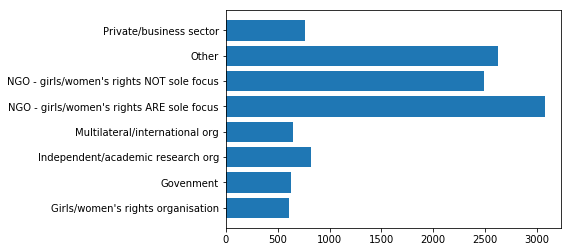

In [317]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.barh(y = f['Q0_Org'], width = f['RespID'])

#### Q0_GeoFocus

In [318]:
set(df['Q0_GeoFocus'])

{'International', 'National or sub-national'}

In [319]:
df[['RespID', 'Q0_GeoFocus']].groupby(by='Q0_GeoFocus').count()

,RespID
Q0_GeoFocus,
International,6004
National or sub-national,5643


#### Qtype

In [320]:
set(df['Qtype'])

{'Likert', 'Multi-punch'}

In [321]:
df[['Qtype', 'RespID']].groupby(by='Qtype').count()

,RespID
Qtype,
Likert,3065
Multi-punch,8582


I don't know what Likert refers to. Maybe it's the equivalent of open-ended.

#### Question Grouping

In [322]:
set(df['Question Grouping'])

{'To what extent are the following factors relevant in explaining gaps in government data sources relating to gender equality?',
 'What should be the three biggest priorities today in relation to gender equality?'}

In [323]:
df[['Question Grouping', 'RespID']].groupby(by='Question Grouping').count()

,RespID
Question Grouping,
To what extent are the following factors relevant in explaining gaps in government data sources relating to gender equality?,3065
What should be the three biggest priorities today in relation to gender equality?,8582


The counts for Question Grouping match those for Qtype, maybe they are equivalent

In [324]:
df[['RespID','Question Grouping']][df['Qtype'] == 'Multi-punch'].groupby(by='Question Grouping').count()

,RespID
Question Grouping,
What should be the three biggest priorities today in relation to gender equality?,8582


Yup, so I will just keep Question Grouping, but I think it has to be encoded, too wordy

#### Wording

In [325]:
df['Wording'].unique()

array(['1= top 3 priority; 0=not a top priority',
       "Collecting data on issues that affect girls and women in policymaking isn't prioritized",
       'There is little demand from advocates for data relating to gender equality',
       'Gender data is harder to collect than other data',
       "There isn't enough technical know-ho within government related to gender data",
       "There isn't enough funding for the government to collect better gender data"],
      dtype=object)

In [326]:
df['Wording'][df['Qtype'] == 'Multi-punch'].unique()

array(['1= top 3 priority; 0=not a top priority'], dtype=object)

In [327]:
df['Wording'][df['Qtype'] != 'Multi-punch'].unique()

array(["Collecting data on issues that affect girls and women in policymaking isn't prioritized",
       'There is little demand from advocates for data relating to gender equality',
       'Gender data is harder to collect than other data',
       "There isn't enough technical know-ho within government related to gender data",
       "There isn't enough funding for the government to collect better gender data"],
      dtype=object)

For the question about the extent of gaps in gov data, Wording is the option 1-top priority or 0-not top priority  
For the question about what should be priorities, Wording is the choice from among the 5 options

#### Question ID

In [328]:
df['Question ID'].unique()

array(['@q4@1', '@q4@2', '@q4@3', '@q4@4', '@q4@5', '@q4@6', '@q4@7',
       '@q4@8', '@q4@9', '@q4@10', '@q4@11', '@q4@12', '@q4@13', '@q4@14',
       'q11@a', 'q11@b', 'q11@c', 'q11@d', 'q11@e'], dtype=object)

#### Value

In [329]:
df['Value'].unique()

array([  1,   0,   3,   4,   2,   5, -99])

I would guess that -99 was used to encode missing data

#### Labels

In [330]:
df['Labels'].unique()

array(['Sexual and reproductive health and rights',
       'no Access to comprehensive health services',
       'no Reducing gender-based violence',
       'Equitable and quality education at all levels',
       'no Economic empowerment, access to land and financial inclusion',
       'no Women and work, unpaid care, pay gap',
       "no Women's political and civil society participation",
       'no Access to public infrastructure, including clean energy, water and sanitation',
       'Women and the effects of climatic and environmental changes',
       'no Girls and women in conflict/post-conflict situations',
       'no Public finance, public spending and taxation',
       'no None of the above', "no Don't know", 'no No answer',
       'Very relevant', 'Not very relevant', 'Not at all relevant',
       'Fairly relevant', 'Reducing gender-based violence',
       'no Equitable and quality education at all levels',
       'Access to public infrastructure, including clean energy, water a

For the multi-punch question, respondents chose value 1 for the three values of Labels they thought should be top 3 priorities  
For the Likert question, respondents chose a lable of Relevance with a corresponding Value (4 for not relevant and 1 for very relevant) for each of the five wordings

In [331]:
df['Labels'][df['Value'] == -99].unique()

array(['No answer'], dtype=object)

Yup, value of -99 corresponds to no answer

In [332]:
f = df[['Question ID', 'RespID']].groupby('RespID').count()
f[f['Question ID'] != 19]

,Question ID
RespID,


All respondents have all 19 questions entered in some form

In [333]:
df.count()

RespID               11647
Q0_Gender            11647
Q0_Generation        11647
Q0_Location          11647
Q0_Org               11647
Q0_GeoFocus          11647
Qtype                11647
Question Grouping    11647
Wording              11647
Question ID          11647
Value                11647
Labels               11647
dtype: int64

No missing data, nominally because there are a lot of encoded missing data, eg 'no answer'

In [334]:
df.rename(index=str, columns={'RespID':'id',
                              'Q0_Gender': 'gender',
                              'Q0_Generation': 'generation',
                              'Q0_Location': 'location',
                              'Q0_GeoFocus': 'focus',
                              'Q0_Org': 'org',
                              'Qtype': 'qtype',
                              'Question Grouping': 'question',
                              'Wording': 'wording',
                              'Question ID': 'qno',
                              'Value': 'respValue',
                              'Labels': 'respLabel'},
         inplace=True)

Renamed df for ease of access

In [335]:
df.drop('qno', axis=1, inplace=True)

#### Sexual and reproductive health and rights

In [336]:
df_q1 = df.iloc[::19,]

#### Access to health services

In [337]:
df_q2 = df.iloc[1::19,]

#### Gender-based violence

In [338]:
df_q3 = df.iloc[2::19,]

#### Equitable and quality education

In [339]:
df_q4 = df.iloc[3::19]

#### Economic empowerment

In [340]:
df_q5 = df.iloc[4::19,]

#### Women and work, unpaid care, pay gap

In [341]:
df_q6 = df.iloc[5::19,]

#### Political and civil participation

In [342]:
df_q7 = df.iloc[6::19,]

#### Access to public infractructure

In [343]:
df_q8 = df.iloc[7::19,]

#### Climate and environmental change

In [344]:
df_q9 = df.iloc[8::19,]

#### Conflict situations

In [345]:
df_q10 = df.iloc[9::19,]

#### Public finance, spending and taxation

In [346]:
df_q11 = df.iloc[10::19,]

#### None of the above

In [347]:
df_q12 = df.iloc[11::19,]

In [348]:
df_q12.head()

,id,gender,generation,location,org,focus,qtype,question,wording,respValue,respLabel
11,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,no None of the above
30,2,Female,30-49,Asia,Other,National or sub-national,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,no None of the above
49,3,Female,29 and under,North America and Europe,Other,National or sub-national,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,no None of the above
68,4,Female,30-49,Other,Private/business sector,National or sub-national,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,no None of the above
87,5,Female,30-49,No answer (International),NGO - girls/women's rights NOT sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,no None of the above


In [349]:
df_q12[['id','respValue']].groupby(by='respValue').count()

,id
respValue,
0,610
1,3


Only three respondents chose 'None of the above'

#### Don't know

In [350]:
df_q13 = df.iloc[12::19,]

In [351]:
df_q13[['id','respValue']].groupby(by='respValue').count()

,id
respValue,
0,609
1,4


Only four respondents chose 'Don't know'

#### No answer

In [352]:
df_q14 = df.iloc[13::19,]

In [353]:
df_q14[['id','respValue']].groupby(by='respValue').count()

,id
respValue,
0,613


No respondents chose 'No answer', or maybe no respondents failed to fill in something

#### Collecting data on issues affecting women in policymaking

In [354]:
df_q15a = df.iloc[14::19,]

#### Demand from advocates for data

In [355]:
df_q15b = df.iloc[15::19,]

#### Gender data is hard to collect

In [356]:
df_q15c = df.iloc[16::19,]

#### Not enough technical knowledge within government

In [357]:
df_q15d = df.iloc[17::19,]

#### Not enough government funding for data collection

In [358]:
df_q15e = df.iloc[18::19,]

What are the encodings for respValue?

In [359]:
df_q15a['respLabel'][df_q15a['respValue'] == 1].unique()

array(['Very relevant'], dtype=object)

In [360]:
df_q15a['respLabel'][df_q15a['respValue'] == 2].unique()

array(['Fairly relevant'], dtype=object)

In [361]:
df_q15a['respLabel'][df_q15a['respValue'] == 3].unique()

array(['Not very relevant'], dtype=object)

In [362]:
df_q15a['respLabel'][df_q15a['respValue'] == 4].unique()

array(['Not at all relevant'], dtype=object)

In [363]:
df_q15a['respLabel'][df_q15a['respValue'] == 5].unique()

array(["Don't know"], dtype=object)

In [364]:
df_q15a['respLabel'][df_q15a['respValue'] == -99].unique()

array(['No answer'], dtype=object)

For the relevance questions, respValue takes on:  
1 for Very relevant  
2 for Fairly relevant  
3 for Not very relevant  
4 for Not at all relevant  
5 for Don't know  
-99 for No answer

Clean up respLabel columns  
Perhaps the difference corresponds to an actual difference in the phrasing of the question and with more data it could be interesting to look at the relationship
between phrasing and response

In [365]:
df_q1['respLabel'].unique()

array(['Sexual and reproductive health and rights',
       'no Sexual and reproductive health and rights'], dtype=object)

In [366]:
df_q1['respLabel'] = 'Sexual and reproductive health and rights'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [367]:
df_q1['respLabel'].unique()

array(['Sexual and reproductive health and rights'], dtype=object)

In [368]:
df_q2['respLabel'].unique()

array(['no Access to comprehensive health services',
       'Access to comprehensive health services'], dtype=object)

In [369]:
df_q2['respLabel'] = 'Access to comprehensive health services'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [370]:
df_q2['respLabel'].unique()

array(['Access to comprehensive health services'], dtype=object)

In [371]:
df_q3['respLabel'].unique()

array(['no Reducing gender-based violence',
       'Reducing gender-based violence'], dtype=object)

In [372]:
df_q3['respLabel'] = 'Reducing gender-based violence'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [373]:
df_q3['respLabel'].unique()

array(['Reducing gender-based violence'], dtype=object)

In [374]:
df_q4['respLabel'].unique()

array(['Equitable and quality education at all levels',
       'no Equitable and quality education at all levels'], dtype=object)

In [375]:
df_q4['respLabel'] = 'Equitable and quality education at all levels'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [376]:
df_q4['respLabel'].unique()

array(['Equitable and quality education at all levels'], dtype=object)

In [377]:
df_q5['respLabel'].unique()

array(['no Economic empowerment, access to land and financial inclusion',
       'Economic empowerment, access to land and financial inclusion'],
      dtype=object)

In [378]:
df_q5['respLabel'] = 'Economic empowerment, access to land and financial inclusion'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [379]:
df_q5['respLabel'].unique()

array(['Economic empowerment, access to land and financial inclusion'],
      dtype=object)

In [380]:
df_q6['respLabel'].unique()

array(['no Women and work, unpaid care, pay gap',
       'Women and work, unpaid care, pay gap'], dtype=object)

In [381]:
df_q6['respLabel'] = 'Women and work, unpaid care, pay gap'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [382]:
df_q6['respLabel'].unique()

array(['Women and work, unpaid care, pay gap'], dtype=object)

In [383]:
df_q7['respLabel'].unique()

array(["no Women's political and civil society participation",
       "Women's political and civil society participation"], dtype=object)

In [384]:
df_q7['respLabel'] = 'Women and the effects of climatic and environmental changes'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [385]:
df_q7['respLabel'].unique()

array(['Women and the effects of climatic and environmental changes'],
      dtype=object)

In [386]:
df_q8['respLabel'].unique()

array(['no Access to public infrastructure, including clean energy, water and sanitation',
       'Access to public infrastructure, including clean energy, water and sanitation'],
      dtype=object)

In [387]:
df_q8['respLabel'] = 'Girls and women in conflict/post-conflict situations'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [388]:
df_q8['respLabel'].unique()

array(['Girls and women in conflict/post-conflict situations'],
      dtype=object)

In [389]:
df_q9['respLabel'].unique()

array(['Women and the effects of climatic and environmental changes',
       'no Women and the effects of climatic and environmental changes'],
      dtype=object)

In [390]:
df_q9['respLabel'] = 'Public finance, public spending and taxation'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [391]:
df_q9['respLabel'].unique()

array(['Public finance, public spending and taxation'], dtype=object)

In [392]:
df_q10['respLabel'].unique()

array(['no Girls and women in conflict/post-conflict situations',
       'Girls and women in conflict/post-conflict situations'],
      dtype=object)

In [393]:
df_q10['respLabel'] = 'None of the above'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [394]:
df_q10['respLabel'].unique()

array(['None of the above'], dtype=object)

In [395]:
df_q11['respLabel'].unique()

array(['no Public finance, public spending and taxation',
       'Public finance, public spending and taxation'], dtype=object)

In [396]:
df_q11['respLabel'] = 'Do not know'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [397]:
df_q11['respLabel'].unique()

array(['Do not know'], dtype=object)

In [398]:
df_q12['respLabel'].unique()

array(['no None of the above', 'None of the above'], dtype=object)

In [399]:
df_q12['respLabel'] = 'No answer'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [400]:
df_q12['respLabel'].unique()

array(['No answer'], dtype=object)

In [401]:
df_q13['respLabel'].unique()

array(["no Don't know", "Don't know"], dtype=object)

In [402]:
df_q14['respLabel'].unique()

array(['no No answer'], dtype=object)

Do I need to make similar edits to q13?

In [403]:
df_q15a['wording'].unique()

array(["Collecting data on issues that affect girls and women in policymaking isn't prioritized"],
      dtype=object)

In [404]:
df_q15a['question'].unique()

array(['To what extent are the following factors relevant in explaining gaps in government data sources relating to gender equality?'],
      dtype=object)

Nope!

Try to format multi-punch questions for a network visualization

In [405]:
df_q1.columns

Index(['id', 'gender', 'generation', 'location', 'org', 'focus', 'qtype',
       'question', 'wording', 'respValue', 'respLabel'],
      dtype='object')

In [406]:
df_q2.columns

Index(['id', 'gender', 'generation', 'location', 'org', 'focus', 'qtype',
       'question', 'wording', 'respValue', 'respLabel'],
      dtype='object')

In [407]:
df_q1.reset_index(drop = True, inplace = True)
df_q2.reset_index(drop = True, inplace = True)
df_q3.reset_index(drop = True, inplace = True)
df_q4.reset_index(drop = True, inplace = True)
df_q5.reset_index(drop = True, inplace = True)
df_q6.reset_index(drop = True, inplace = True)
df_q7.reset_index(drop = True, inplace = True)
df_q8.reset_index(drop = True, inplace = True)
df_q9.reset_index(drop = True, inplace = True)
df_q10.reset_index(drop = True, inplace = True)
df_q11.reset_index(drop = True, inplace = True)
df_q12.reset_index(drop = True, inplace = True)
df_q13.reset_index(drop = True, inplace = True)
df_q14.reset_index(drop = True, inplace = True)

In [408]:
df_multipunch = pd.concat([df_q1[['id', 'gender', 'generation', 'location', 'org', 'focus', 'qtype', 'respValue', 'respLabel']],
                           df_q2[['respValue', 'respLabel']],
                           df_q3[['respValue', 'respLabel']],
                           df_q4[['respValue', 'respLabel']],
                           df_q5[['respValue', 'respLabel']],
                           df_q6[['respValue', 'respLabel']],
                           df_q7[['respValue', 'respLabel']],
                           df_q8[['respValue', 'respLabel']],
                           df_q9[['respValue', 'respLabel']],
                           df_q10[['respValue', 'respLabel']],
                           df_q11[['respValue', 'respLabel']],
                           df_q12[['respValue', 'respLabel']],
                           df_q13[['respValue', 'respLabel']],
                           df_q14[['respValue', 'respLabel']]],
                           axis = 1, sort = False)

In [409]:
df_multipunch.head()

,id,gender,generation,location,org,focus,qtype,respValue,respLabel,respValue,...,respValue,respLabel,respValue,respLabel,respValue,respLabel,respValue,respLabel,respValue,respLabel
0,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,1,Sexual and reproductive health and rights,0,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
1,2,Female,30-49,Asia,Other,National or sub-national,Multi-punch,1,Sexual and reproductive health and rights,0,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
2,3,Female,29 and under,North America and Europe,Other,National or sub-national,Multi-punch,1,Sexual and reproductive health and rights,1,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
3,4,Female,30-49,Other,Private/business sector,National or sub-national,Multi-punch,0,Sexual and reproductive health and rights,1,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
4,5,Female,30-49,No answer (International),NGO - girls/women's rights NOT sole focus,International,Multi-punch,1,Sexual and reproductive health and rights,0,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer


In [410]:
df_multipunch.columns

Index(['id', 'gender', 'generation', 'location', 'org', 'focus', 'qtype',
       'respValue', 'respLabel', 'respValue', 'respLabel', 'respValue',
       'respLabel', 'respValue', 'respLabel', 'respValue', 'respLabel',
       'respValue', 'respLabel', 'respValue', 'respLabel', 'respValue',
       'respLabel', 'respValue', 'respLabel', 'respValue', 'respLabel',
       'respValue', 'respLabel', 'respValue', 'respLabel', 'respValue',
       'respLabel', 'respValue', 'respLabel'],
      dtype='object')

In [411]:
df_multipunch.columns = ['id', 'gender', 'generation', 'location', 'org', 'focus', 'qtype',
                        'respValue1', 'respLabel1', 'respValue2', 'respLabel2', 'respValue3', 'respLabel3', 'respValue4', 'respLabel4',
                        'respValue5', 'respLabel5', 'respValue6', 'respLabel6', 'respValue7', 'respLabel7', 'respValue8', 'respLabel8',
                        'respValue9', 'respLabel9', 'respValue10', 'respLabel10', 'respValue11', 'respLabel11', 'respValue12', 'respLabel12',
                        'respValue13', 'respLabel13', 'respValue14', 'respLabel14']

df_multipunch contains the responses of each respondent to each of the multipunch questions

In [412]:
df_multipunch.head()

,id,gender,generation,location,org,focus,qtype,respValue1,respLabel1,respValue2,...,respValue10,respLabel10,respValue11,respLabel11,respValue12,respLabel12,respValue13,respLabel13,respValue14,respLabel14
0,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,1,Sexual and reproductive health and rights,0,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
1,2,Female,30-49,Asia,Other,National or sub-national,Multi-punch,1,Sexual and reproductive health and rights,0,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
2,3,Female,29 and under,North America and Europe,Other,National or sub-national,Multi-punch,1,Sexual and reproductive health and rights,1,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
3,4,Female,30-49,Other,Private/business sector,National or sub-national,Multi-punch,0,Sexual and reproductive health and rights,1,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer
4,5,Female,30-49,No answer (International),NGO - girls/women's rights NOT sole focus,International,Multi-punch,1,Sexual and reproductive health and rights,0,...,0,None of the above,0,Do not know,0,No answer,0,no Don't know,0,no No answer


In [413]:
df_multipunch['respNo'] = df_multipunch['respValue1'] + df_multipunch['respValue2'] + df_multipunch['respValue3'] + df_multipunch['respValue4'] + df_multipunch['respValue5'] + df_multipunch['respValue6'] + df_multipunch['respValue7'] + df_multipunch['respValue8'] + df_multipunch['respValue9'] + df_multipunch['respValue10'] + df_multipunch['respValue11'] + df_multipunch['respValue12'] + df_multipunch['respValue13'] + df_multipunch['respValue14']

In [414]:
df_multipunch['respNo'].head()

0    3
1    3
2    3
3    3
4    3
Name: respNo, dtype: int64

In [415]:
df_multipunch[['respNo', 'id']].groupby(by='respNo').count()

,id
respNo,
1,7
3,606


Nobody failed to respond, but many respondents only chose 1 or 2 of the options

For the network I want:  
Nodes = one for every respLabel  
Edges = connect each respLabel to every other respLabel with weight := number of respondents in common

In [416]:
df_multipunch['respValue11'] += df_multipunch['respValue13']

In [417]:
df_multipunch['respValue12'] += df_multipunch['respValue14']

Dealing with duplicate columns ^

In [418]:
df_multipunch.drop(['respValue13', 'respLabel13', 'respValue14', 'respLabel14'], axis=1, inplace=True)

Finding data for the edges

In [419]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue2'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


53

In [420]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue3'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


140

In [421]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue4'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


78

In [422]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue5'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


72

In [423]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue6'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


50

In [424]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue7'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


62

In [425]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue8'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


12

In [426]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


18

In [427]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


31

In [428]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


12

In [429]:
df_multipunch[df_multipunch['respValue1'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [430]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue3'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


62

In [431]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue4'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


43

In [432]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue5'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


33

In [433]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue6'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


15

In [434]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue7'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


23

In [435]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue8'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7

In [436]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


6

In [437]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


9

In [438]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


3

In [439]:
df_multipunch[df_multipunch['respValue2'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [440]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue4'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


90

In [441]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue5'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


105

In [442]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue6'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


98

In [443]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue7'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


105

In [444]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue8'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


18

In [445]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


23

In [449]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


46

In [450]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


21

In [451]:
df_multipunch[df_multipunch['respValue3'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [452]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue5'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


67

In [453]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue6'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


44

In [454]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue7'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


51

In [455]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue8'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


18

In [456]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10

In [457]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


21

In [458]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10

In [459]:
df_multipunch[df_multipunch['respValue4'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [460]:
df_multipunch[df_multipunch['respValue5'] == 1][df_multipunch['respValue6'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


53

In [461]:
df_multipunch[df_multipunch['respValue5'] == 1][df_multipunch['respValue7'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


63

In [462]:
df_multipunch[df_multipunch['respValue5'] == 1][df_multipunch['respValue8'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


22

In [463]:
df_multipunch[df_multipunch['respValue5'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


18

In [464]:
df_multipunch[df_multipunch['respValue5'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


22

In [465]:
df_multipunch[df_multipunch['respValue5'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


9

In [466]:
df_multipunch[df_multipunch['respValue5'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [467]:
df_multipunch[df_multipunch['respValue6'] == 1][df_multipunch['respValue7'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


54

In [468]:
df_multipunch[df_multipunch['respValue6'] == 1][df_multipunch['respValue8'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5

In [470]:
df_multipunch[df_multipunch['respValue6'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


6

In [471]:
df_multipunch[df_multipunch['respValue6'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


14

In [472]:
df_multipunch[df_multipunch['respValue6'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


15

In [473]:
df_multipunch[df_multipunch['respValue6'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [474]:
df_multipunch[df_multipunch['respValue7'] == 1][df_multipunch['respValue8'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10

In [475]:
df_multipunch[df_multipunch['respValue7'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


13

In [476]:
df_multipunch[df_multipunch['respValue7'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


24

In [477]:
df_multipunch[df_multipunch['respValue7'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


11

In [478]:
df_multipunch[df_multipunch['respValue7'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [479]:
df_multipunch[df_multipunch['respValue8'] == 1][df_multipunch['respValue9'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


8

In [480]:
df_multipunch[df_multipunch['respValue8'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2

In [481]:
df_multipunch[df_multipunch['respValue8'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4

In [482]:
df_multipunch[df_multipunch['respValue8'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [483]:
df_multipunch[df_multipunch['respValue9'] == 1][df_multipunch['respValue10'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


6

In [484]:
df_multipunch[df_multipunch['respValue9'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2

In [485]:
df_multipunch[df_multipunch['respValue9'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [486]:
df_multipunch[df_multipunch['respValue10'] == 1][df_multipunch['respValue11'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1

In [489]:
df_multipunch[df_multipunch['respValue10'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [488]:
df_multipunch[df_multipunch['respValue11'] == 1][df_multipunch['respValue12'] == 1].count()[0]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [447]:
df.head()

,id,gender,generation,location,org,focus,qtype,question,wording,respValue,respLabel
0,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,1,Sexual and reproductive health and rights
1,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,Access to comprehensive health services
2,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,Reducing gender-based violence
3,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,1,Equitable and quality education at all levels
4,1,Female,30-49,No answer (International),NGO - girls/women's rights ARE sole focus,International,Multi-punch,What should be the three biggest priorities today in relation to gender equality?,1= top 3 priority; 0=not a top priority,0,"Economic empowerment, access to land and financial inclusion"


In [448]:
df.columns

Index(['id', 'gender', 'generation', 'location', 'org', 'focus', 'qtype',
       'question', 'wording', 'respValue', 'respLabel'],
      dtype='object')